<a href="https://colab.research.google.com/github/MouliChintakunta-AI/DLTutors/blob/main/SigmoidNeuron_R_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss,mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Sigmoid Neuron clean code

In [2]:
bc_dataset = datasets.load_breast_cancer()
features = bc_dataset.data
label = bc_dataset.target

In [4]:
df_bc = pd.DataFrame(features,columns=bc_dataset.feature_names)
df_bc['class'] = label

In [5]:
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X = df_bc.drop('class',axis=1)
Y = df_bc['class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=.3,stratify=Y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
X_train_scaled.shape

(398, 30)

In [9]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-(self.perceptron(x))))

  def grad_w(self,x,y):
    fx = self.sigmoid(x)
    return (fx - y) * (fx) * (1-fx) * x

  def grad_b(self,x,y):
    fx = self.sigmoid(x)
    return (fx - y) * (fx) * (1-fx)

  def predict(self,X) -> np.ndarray:
    y_pred = []
    for x in X:
      y_pred.append(self.sigmoid(x))
    return np.array(y_pred)

  def fit(self,X,Y,epochs=1000,learning_rate = 1,init=True,display_loss = True):
    if init:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0.5
      if display_loss:
        loss = {}
    for epoch in tqdm_notebook(range(epochs),"Training Sigmoid Neuron",unit='epoch'):
      dw,db = 0,0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      if display_loss:
        y_pred = self.predict(X)
        loss[epoch] = mean_squared_error(y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("MSE")
      plt.show()

In [10]:
sn = SigmoidNeuron()

<ipython-input-9-5d1dcc8963b6>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),"Training Sigmoid Neuron",unit='epoch'):


Training Sigmoid Neuron:   0%|          | 0/100 [00:00<?, ?epoch/s]

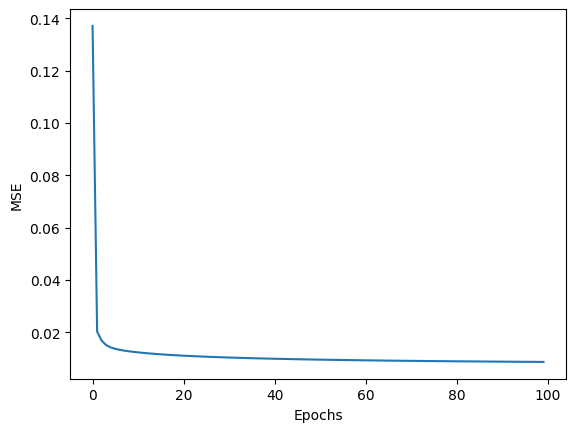

In [11]:
sn.fit(X_train_scaled,Y_train.values,100,0.15,True,True)

In [13]:
y_train_pred = sn.predict(X_train_scaled)
y_test_pred = sn.predict(X_test_scaled)
y_train_pred = (y_train_pred > 0.5).astype("int")
y_test_pred = (y_test_pred > 0.5).astype("int")
print("Train Accuracy:" , accuracy_score(y_train_pred,Y_train.values))
print("Test Accuracy:" , accuracy_score(y_test_pred,Y_test.values))

Train Accuracy: 0.992462311557789
Test Accuracy: 0.9532163742690059


#Plotting errors & contours

In [23]:
def perceptron(x,w,b):
    return np.dot(x,w) + b

def sigmoid(x,w,b):
    return 1.0 / (1.0 + np.exp(-(perceptron(x,w,b))))

X = np.linspace(-10,10,100)
w = 1.5
b = 0.2
Y = sigmoid(X,w,b)

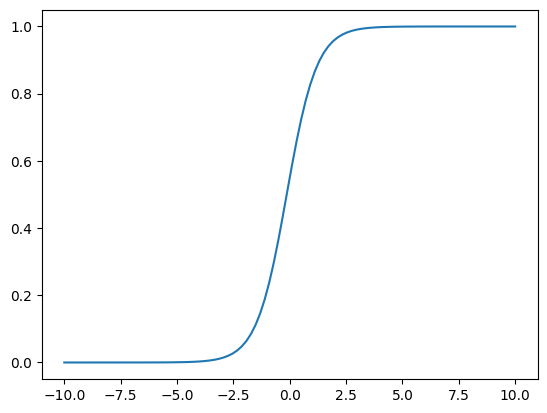

In [24]:
plt.plot(X,Y)
#plt.scatter(X,Y)
plt.show()